# Chapter 5: Boolean Indexing

## Recipes
* [5.1 Calculating boolean statistics](#5.1-Calculating-boolean-statistics)
* [5.2 Constructing multiple boolean conditions](#5.2-Constructing-multiple-boolean-conditions)
* [5.3 Filtering with boolean indexing](#5.3-Filtering-with-boolean-indexing)
* [5.4 Replicating boolean indexing with index selection](#5.4-Replicating-boolean-indexing-with-index-selection)
* [5.5 Selecting with unique and sorted indexes](#5.5-Selecting-with-unique-and-sorted-indexes)
* [5.6 Gaining perspective on stock prices](#5.6-Gaining-perspective-on-stock-prices)
* [5.7 Translating SQL WHERE clauses](#5.7-Translating-SQL-WHERE-clauses)
* [5.8 Determing normality of stock market returns](#5.8-Determing-normality-of-stock-market-returns)
* [5.9 Improving readability of boolean indexing with the query method](#5.9-Improving-readability-of-boolean-indexing-with-the-query-method)
* [5.10 Preserving DataFrames with the where method](#5.10-Preserving-DataFrames-with-the-where-method)
* [5.11 Masing DataFrame rows](#5.11-Masing-DataFrame-rows)
* [5.12 Selecting with booleans, integer location and labels](#5.12-Selecting-with-booleans,-integer-location-and-labels)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import DataReader

%matplotlib inline

# 5.1 Calculating boolean statistics

In [2]:
### [Tech]bool series 생성 및 갯수 세기 = sum(),  비율이 = mean() 이 된다. 
#         단, 누락값은 연산 전에 제외 해야 한다. 
### [Goal] movie와 관련된 boolean series를 생성하고, T/F 를 이용한 개수, 평균 값의 계산

## >> How it works...

In [3]:
# 5.1.1 movie.csv에서 영화제목 movie_title을 인덱스로 하는 movie DataFrame을 생성한다. 
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
# 5.1.2  movie['duration'] Series 에  크다 연산자를 이용해서 
#        120분 이상 넘는지 여부를 갖는 Boolean Series movie_2_hours를 생성한다. 
movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [5]:
# 5.1.3 2시간 이상 영화 개수 = movie_2_hours .. True의 개수를 합산한다. 
movie_2_hours.sum()

1039

In [6]:
# 5.1.4 2시간 이상의 영화 비율 = movie_2_hours.. True 의 평균
movie_2_hours.mean()

0.2113506916192026

In [7]:
# 5.1.5   5.1.4 에는 duration 누락값을 모수로 하는 문제가 있다.  
#         (누락값과의 비교도 false가 되기 때문)
#         계산 시에 누락값을 제외하고 산출한다. 
#         아래 식은 movie table을 변경하지는 않는다.
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [8]:
# 5.1.6   describe()를 사용해서 블리언 Series에 대한 요약 통계량을 살펴볼 수 있다. 
movie['duration'].dropna().gt(120).describe()

count      4901
unique        2
top       False
freq       3862
Name: duration, dtype: object

## >> There's more...5.1

In [9]:
# 5.1.5 의 산식은  1039/4901 로 구해진다.  
# normalize = True 를 매개변수로 하는 value_counts()로 확인할 수 있다. 
movie['duration'].dropna().gt(120).value_counts()

False    3862
True     1039
Name: duration, dtype: int64

In [10]:
movie['duration'].dropna().gt(120).value_counts(normalize = True)

False    0.788002
True     0.211998
Name: duration, dtype: float64

In [11]:
movie_2_hours.value_counts() / movie_2_hours.size

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [12]:
# DataFrame 내 2개 컬럼 비교로 boolean Series 를 생성한다. 
# 2 컬럼의 누락값을 삭제하고 시작한다. 
# actor1 과 actor2 의 facebook 좋아요를 비교하여 actor1이 많은 경우 추출

actors = movie[['actor_1_facebook_likes', 'actor_2_facebook_likes']].dropna()
(actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']).mean()

0.9777687130328371

# 5.2 Constructing multiple boolean conditions

In [13]:
### [Tech] pandas의 boolean 은  & , | , ~ 으로 구현 
"""
python -> and / or / not
pandas boolean indexing -> & / | / ~ with ()
! Tip : 복수 조건의 경우 각 조건을 criteriaN으로 선언 후 조합하면 가독성이 향상된다.
"""
### [Goal] movie에서 보다 복잡한 논리연산식의 구현 해 본다. 

'\npython -> and / or / not\npandas boolean indexing -> & / | / ~ with ()\n! Tip : 복수 조건의 경우 각 조건을 criteriaN으로 선언 후 조합하면 가독성이 향상된다.\n'

## >> How it works...

In [14]:
# 5.2.1 movie.csv에서 movie_title을 인덱스로 하는 movie DataFrame을 생성한다. 
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [15]:
# 5.2.2 복잡한 조건의 논리식을 구현해 본다.
#   criteria1 : 영화평점 > 8
#   criteria2 : 관람등급 == 'PG-13'
#   criteria3 : 2000년 이전 또는  2009년 이후 영화
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = (movie.title_year < 2000) | (movie.title_year >= 2010)

criteria2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [16]:
# 5.2.3 모든 기준을 통합해 단일 boolean Series 를 구성
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

## >> There's more...5.2

In [17]:
# python 자료구조는 and, or, not 으로 논리식을 연결하고, 우선 순위도 가장 낮다.
# pandas의 객체 간 비교는  and, or, not을 사용할 수 없고 
# bit 연산자인 & , | , ~ 을 사용한다. 
# 이들은 연산의 우선 순위가 높아서 괄호를 잘 사용해야 한다. 

In [18]:
# python 자료 list는 and 처리가 마지막에 수행 된다. 
list1 = [1,2,3,]
list2 = [4,5,6,]
list3 = [7,8,9,]

list1 < list2 and list3 < list1

False

In [19]:
# pandas 객체는 괄호를 명확히 해야 한다. (bit 연산자는 우선 순위가 높다)
(movie.title_year < 2000) | (movie.title_year > 2009)

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                        True
The Following                                 False
A Plague So Pleasant                           True
Shanghai Calling                               True
My Date with Drew                             False
Name: title_year, Length: 4916, dtype: bool

In [20]:
# 괄호가 없으면 2000 | movie.title_year를 먼저 계산하려 한다. 
movie.title_year < 2000 | movie.title_year > 2009

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

# 5.3 Filtering with boolean indexing

In [21]:
### [Tech] 대상이 되는 DataFrame (또는 Series)와 동일한 인덱스를 갖는  boolean series 를
#          인덱스 연산자 [] 안으로 전달 하면 True 값을 갖는 행 만 추출한다.  

### [Goal] movie에서 Boolean Series를 이용해서 부분집합을 선택, 즉, 필터링을 수행한다.
#  (영화 평점 8 이상, 영화등급 'PG-13',  2000년 전 또는 2009년 후 개봉작 ) 이거나 
#  (영화 평점 5 미만, 영화등급 'R',  2000년 ~ 2010년 개봉작)인 영화를 선택해보자. 

## >> How it works...

In [22]:
# 5.3.1 movie.csv에서 movie_title을 인덱스로 하는 movie DataFrame을 생성한다. 
#     5.2.2 ~5.2.3 에서 생성한 논리값 => boolean Series 생성한다. 
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [23]:
# 5.3.2  이 번에는 영화 평점이 5보다 낮고,  영화등급이 'R' 이면서 
#    2000년에서 2010년 사이라는 조건을 만족하는 boolean Series를 생성한다. 
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [24]:
display (final_crit_a.head(5))
display (final_crit_b.head(5))

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                         False
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [25]:
# 5.3.3  | (or 연산자) 를 이용해서 두 Series간 or 연산을 수행한다. 
final_crit_all = final_crit_a | final_crit_b
final_crit_all.tail()

movie_title
Signed Sealed Delivered    False
The Following              False
A Plague So Pleasant       False
Shanghai Calling           False
My Date with Drew          False
dtype: bool

In [26]:
# 5.3.4  movie에 인덱스 연산자 [] 내에 final_crit_all 을 전달한다. 
#      이렇게 하면 True 값을 갖는 필드만 filter 되어서 남게 된다. 
#       False 값을 갖는 행은 제거 (filter out)된다.
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [27]:
# 5.3.5  관련 필드만 살펴본다. 
#        행인덱스에는 블리언 인덱싱과 컬럼 인덱스에는 팬시 인덱싱을 적용했다. 
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0
Sex and the City 2,4.3,R,2010.0


## >> There's more... 5.3

In [28]:
# 논리식을 하나로 연결해서 작성하는 것도 가능하다. 
"""
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)
final_crit_b = crit_b1 & crit_b2 & crit_b3

하나의 논리식으로 표현 가능하다. 
"""
final_crit_a2 = (movie.imdb_score > 8) & \
                (movie.content_rating == 'PG-13') & \
                ((movie.title_year < 2000) | (movie.title_year > 2009))
final_crit_a2.equals(final_crit_a)

True

# 5.4 Replicating boolean indexing with index selection

In [29]:
### [Tech] 블리언 인덱싱은 해당 컬럼을 인덱스로 지정해서 선택하는 것보다
#          실행에 많은 시간이 소요 된다. 
#          단,  set index도 시간이 걸리는 연산이다. 
### [Goal] college의 STABBR 를 통해  인덱스 필터링과 인덱스 지정의 성능을 비교 해 본다. 

## >> How it works...

In [30]:
# 5.4.1 college.csv에서 college DataFrame을 생성한다. 
#       STABBR 가 'TX' 인  행을 Boolean Indexing으로 선별해 본다. 
#       college['STABBR'] == 'TX' 는 True/False를 갖는 boolean Series가 생성된다. 
#       이 Series를 college의 인덱스 연산자[]에 전달하면 
#       결과적으로 STABBR이 'TX'인 행만 선별된다. 

college = pd.read_csv('data/college.csv')
college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [31]:
# 5.4.2  한편, STABBR을 인덱스로 지정하고 , .loc[] 인덱서에 'TX'를 전달하여 
#        동일한 결과가 나오도록 구현 할 수 있다. 

college2 = college.set_index('STABBR')
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [32]:
# 5.4.3 불리언 인덱싱과 인덱스 지정 방식의 속도를 비교해보자
# 블리언 인덱싱이 3배 정도 더 시간이 소요 된다. 

#  불리언 인덱싱
%timeit college[college['STABBR'] == 'TX']

2.95 ms ± 560 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
# 인덱스 지정
%timeit college2.loc['TX']

1.35 ms ± 52.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
# 5.4.4 단, 처음 인덱스를 생성할 때, 시간이 소요된다. 
%timeit college2 = college.set_index('STABBR')

4.18 ms ± 616 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## >> There's more...5.4

In [35]:
# 복수 개의 주state 선택을 .isin을 통해서 구현 할 수 있다. 
states =['TX', 'CA', 'NY']
college[college['STABBR'].isin(states)].count()

INSTNM                1704
CITY                  1704
STABBR                1704
HBCU                  1592
MENONLY               1592
WOMENONLY             1592
RELAFFIL              1704
SATVRMID               221
SATMTMID               222
DISTANCEONLY          1592
UGDS                  1504
UGDS_WHITE            1504
UGDS_BLACK            1504
UGDS_HISP             1504
UGDS_ASIAN            1504
UGDS_AIAN             1504
UGDS_NHPI             1504
UGDS_2MOR             1504
UGDS_NRA              1504
UGDS_UNKN             1504
PPTUG_EF              1495
CURROPER              1704
PCTPELL               1494
PCTFLOAN              1494
UG25ABV               1462
MD_EARN_WNE_P10       1384
GRAD_DEBT_MDN_SUPP    1696
dtype: int64

# 5.5 Selecting with unique and sorted indexes

In [36]:
### [Tech]인덱스가 정렬되고, 모든 레이블이 고유하게 구성되면, boolean filter 대비 더욱 빠르다.
### [Goal] college에서 STABBR(duplicated) 과 INSTNM(unique) index의 성능을 비교해 본다. 

## >> How it works...

In [37]:
# 5.5.1 college.csv에서 STABBR 인덱스로 하는 college2 DataFrame을 생성한다. 
#    STABBR 이 정렬 되어 있는지 확인해본다. (.is_monotonic)
college = pd.read_csv('data/college.csv')
college2 = college.set_index('STABBR')
college2.index.is_monotonic

False

In [38]:
# 5.5.2 college2 인덱스를 정렬해서 college3 객체를 생성하고, 
#      인덱스의 정렬 여부를 다시 확인한다.  
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [39]:
# 5.5.3 college  : boolean indexing ,  
#       college2 : 정렬되지 않은 index
#       college3 : 정렬된 index의 속도를 비교한다. 
#    college3 < college2 < college 로 수행시간이 길어진다. 

# college : boolean indexing
%timeit college[college['STABBR'] == 'TX']

3.11 ms ± 760 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
# college2 : 정렬되지 않은 index
%timeit college2.loc['TX']

2.52 ms ± 257 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
# college3 : 정렬된 index
%timeit college3.loc['TX']

684 µs ± 104 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
# 5.5.4  unique 한 값을 갖는 INSTNM을 인덱스로 지정하고 unique 여부를 확인한다.
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [43]:
# 5.5.5 불리언 인덱싱을 사용한 값 선택 
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [44]:
# 5.5.6 인덱스로 지정하여 값 선택
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

In [45]:
# 5.5.7 두 경우의 속도를 비교 해본다. 
#     불리언 인덱싱 보다 인덱스 지정 방식이 큰 차이로 빠르다.  

# 불리언 연산
%timeit college[college['INSTNM'] == 'Stanford University']

3.71 ms ± 365 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [46]:
# unique 한 인덱스를 갖는 경우
%timeit college_unique.loc['Stanford University']

821 µs ± 94.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## >> There's more... 5.5

In [47]:
# boolean indexing은 복수개 컬럼에 대해서 조건을 부여 할 수 있어 매우 유연하다. 
# 한편, unique하게 구성된 단일 인덱스 선택과 비교하면 크게 속도차이가 난다.(느리다.)
# CITY + STABBR 를 boolean 조건으로 추출 하는 경우와  
# 두 값을 연결해서 하나의 인덱스로 지정한 경우를 비교해보자.  

# CITY, STABBR 를 레이블로 갖는 인덱스 지정하고 정렬한다. 
college.index = college['CITY'] + ', ' + college['STABBR']
college = college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [48]:
# Miami, FL 에 있는 대학 선택
college.loc['Miami, FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


In [49]:
# 속도를 비교하면 10 배 가까운 큰 차이를 확인 할 수 있다. 

%timeit college[(college['CITY'] == 'Miami') & (college['STABBR'] == 'FL')]

6.9 ms ± 987 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
%timeit college.loc['Miami, FL']

692 µs ± 43.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# 5.6 Gaining perspective on stock prices

In [51]:
### [Tech] describe() 는 series를 반환함.  이 series 의 값을 잘 이용해서 원하는 기준 비교 값으로 활용
### [Goal] 어떤 주식에 대해서 일정 기간 동안 종가 Close가 상위 10% 에 해당하는 기간과
#          하위 10%에 해당하는 기간을 구하여 시각화 한다. 

## >> How it works...

In [52]:
# 5.6.1 slb_stock.csv에서 Date 인덱스로 하는 slb DataFrame을 생성한다. 
# 또한 'Date'를 일자로 처리 할 수 있도록  parse_date에 인자로 전달 한다. 

slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [53]:
# 5.6.2 종가 Close를 Series로 선택하여, 요약 통계량을 .describe()로 살펴본다. 
#        상하위 10% 경계값을 확보하기 위해서 percentiles 에 [.1, .9] 를 전달 한다. 
#       이 요약 통계량을 slb_summary에 저장한다. 
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [54]:
# 5.6.3 하위 10% 상위 10 값을 선택하고 해당 구간을 벗어나는 조건 문 criteria을 구성한다. 
#       이 조건문을 사용하여 10% 구간을 벗어나는 기간으로만 구성된 slb_top_bottom_10
#       DataFrame을 생성한다.

upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

In [55]:
criteria.head()

Date
2010-01-04    False
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08    False
Name: Close, dtype: bool

In [56]:
len(slb_close[criteria]) , len(slb_close)

(380, 1895)

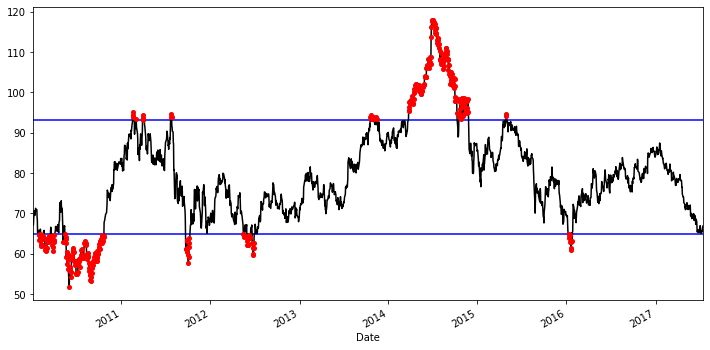

In [57]:
# 5.6.4  위 정보를 이용하여 그래프를 그려보자.

# 전체 주가를 검정색 선으로 표현
slb_close.plot(kind = 'line' , color='black', figsize=(12,6))
# 상하위 10%를 벗어난 값에 대해서 붉은색 마커로 표식한다. 
slb_top_bottom_10.plot(marker='o', linestyle=' ', ms=4, color='r')

# 그래프의 첫 날자와 마지막 날자를 구하고, 하위 10%, 상위 10% 지점에 
# plt.hlines를 이용해서 수평으로 선을 긋는다. 

xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='blue');


## >> There's more... 5.6

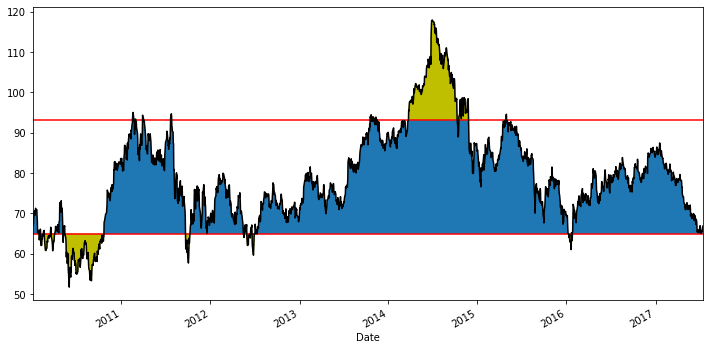

In [58]:
# fillbetween은 두 선 사이의 모든 영역을 색칠한다. 

slb_close.plot(color='black', figsize=(12,6))
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='r')

# 하위 10% 선과 종가 사이
plt.fill_between(criteria.index, lower_10, slb_close.values)
# 종가가 하위 10% 선 보다 낮은 날만 하위 10%선과 종가 사이를 노란색으로 채운다.
plt.fill_between(criteria.index, lower_10, slb_close.values,\
                 where= slb_close < lower_10, color='y')
# 종가가 상위 10% 선보다 높은 날만 상위 10% 선과 종가 사이를 노란 색으로 채운다. 
plt.fill_between(criteria.index, upper_10, slb_close.values,\
                 where= slb_close > upper_10, color='y')

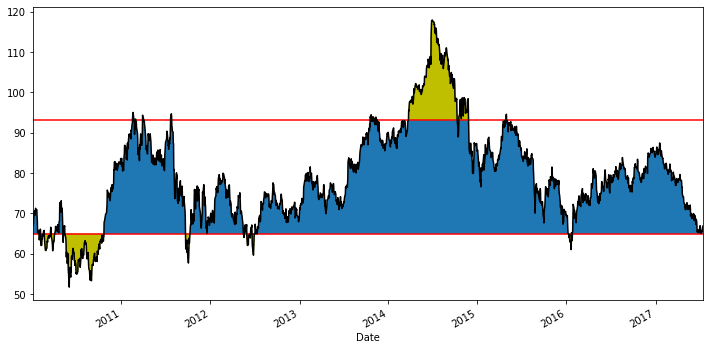

In [70]:
# fillbetween은 두 선 사이의 모든 영역을 색칠한다. 

slb_close.plot(color='black', figsize=(12,6))
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='r')

# 하위 10% 선과 종가 사이
plt.fill_between(criteria.index, lower_10, slb_close.values)
# 종가가 하위 10% 선 보다 낮은 날만 하위 10%선과 종가 사이를 노란색으로 채운다.
plt.fill_between(criteria.index, lower_10, slb_close.values,\
                 where= slb_close < lower_10, color='y')
# 종가가 상위 10% 선보다 높은 날만 상위 10% 선과 종가 사이를 노란 색으로 채운다. 
plt.fill_between(criteria.index, upper_10, slb_close.values,\
                 where= slb_close > upper_10, color='y')
                 


# understanding matplotlib module

In [59]:
# figure 객체 생성
plt.figure(figsize = (8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

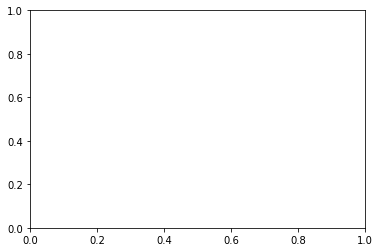

In [60]:
# axes 객체 생성  (자동으로 자체 figure를 갖는다. )
plt.axes()

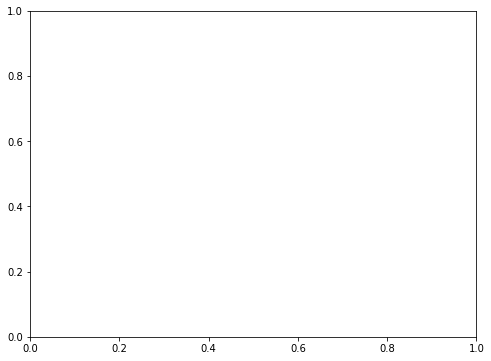

In [61]:
# 명시적으로 figure를 생성한 경우의 axes 생성
plt.figure(figsize = (8,6))
plt.axes()

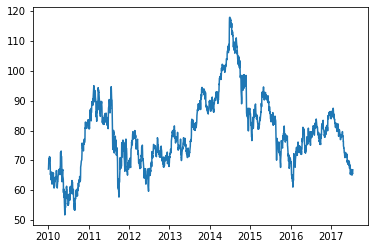

In [62]:
# 상태기반 종가 그리기
plt.plot(slb_close)

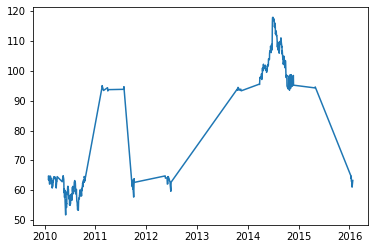

In [63]:
# 상태기반 상하위 10% 경계 벗어난 값 그리기
plt.plot(slb_top_bottom_10)

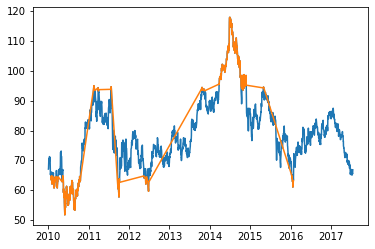

In [64]:
# 종가와 상하위 10% 경계벗어난 값을 하나의 axe에 그리기
plt.plot(slb_close)
plt.plot(slb_top_bottom_10)

Text(0.5, 1.0, 'STOCK PRICE')

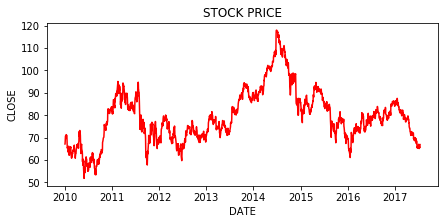

In [65]:
# 상태 기반 (함수 호출) 방식으로 그래프 그리기 

plt.figure (figsize =(7, 3))
plt.plot (slb_close, color = 'r')
plt.ylabel ('CLOSE')
plt.xlabel('DATE')
plt.title('STOCK PRICE')


Text(0.5, 1.0, 'STOCK PRICE')

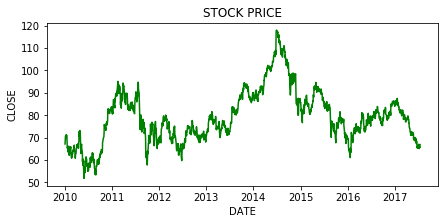

In [66]:
# 무상태 기반 (객체지향) 방식으로 그래프 그리기 
fig, ax = plt.subplots(figsize = (7,3))
ax.plot(slb_close, color = 'g')
ax.set_ylabel ('CLOSE')
ax.set_xlabel('DATE')
ax.set_title('STOCK PRICE')
